In [1]:
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')

# Phase 3:

# Clustering
Clustering is a machine learning technique used to divide data into groups or clusters, where data points within each group are as similar as possible and as different as possible from those in other groups. Clustering aims to uncover patterns or structures within the data without the need for supervision or prior classification.

before applying clustering, we will also remove the "Name" column, since we have IDs for players, we will not need the names, we also need to eliminate that column for when we apply clustering.

In [2]:
df.drop(columns=["Name",'ID','Medal'], inplace=True)

In [3]:
print(df)

      Sex    Age  NOC  Games   Year  Season  City  Sport  Event       BMI  \
0       1  0.325   28      7  0.875       1     5     24    213  0.311567   
1       1  0.375   63      1  0.125       1     4      0      4  0.374202   
2       1  0.375   63      1  0.125       1     4      0      0  0.374202   
3       1  0.475   63      3  0.375       1     7      0      4  0.374202   
4       0  0.300   63      4  0.500       0     1     22    210  0.256012   
...   ...    ...  ...    ...    ...     ...   ...    ...    ...       ...   
2874    0  0.675   32      2  0.250       0     0     10    112  0.263727   
2875    1  0.175   92      2  0.250       0     0     44    363  0.259433   
2876    0  0.400   32      0  0.000       0     6     18    186  0.198646   
2877    0  0.150   64      8  1.000       0     3     31    253  0.350925   
2878    1  0.300   92      1  0.125       1     4     39    309  0.292151   

      discretized_Year  
0                    2  
1                    0  


## Apply K-means clustering
We used the k-means algorithm on the Olympics dataset, transforming the features into numeric values and removing the class label. This enabled us to perform effective clustering, revealing patterns and relationships within the data. These insights are crucial for understanding the factors that influence Olympic performance and for creating improved strategies for athletes and sports management.

We chose the number of clusters k randomly which are k=2, 3, 4, 5, and 6.

In [4]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

## Visualizing Clusters

For n_clusters = 2 The average silhouette_score is : 0.2014992303190818
For n_clusters = 3 The average silhouette_score is : 0.156547427314345
For n_clusters = 4 The average silhouette_score is : 0.14311644376135696
For n_clusters = 5 The average silhouette_score is : 0.17269943709370808
For n_clusters = 6 The average silhouette_score is : 0.18740659558509898


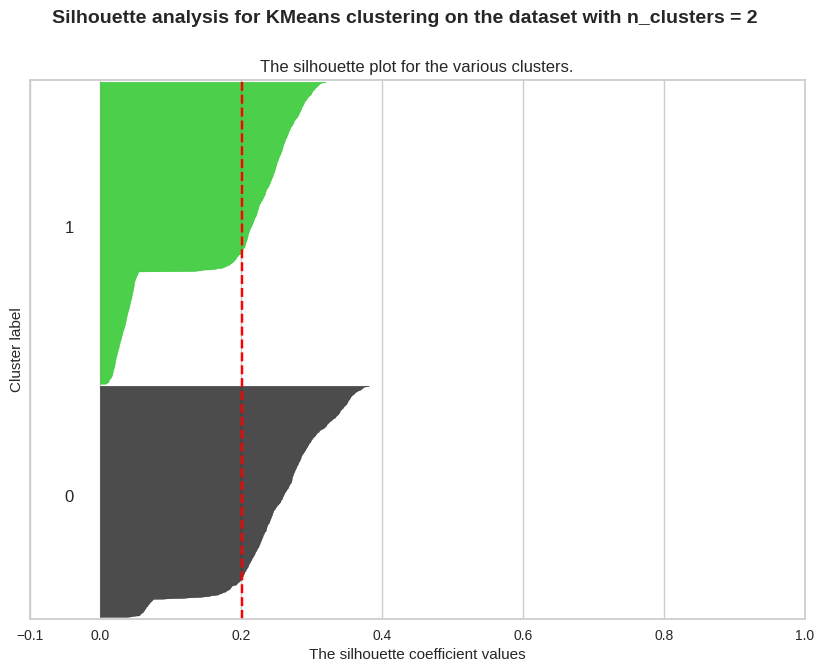

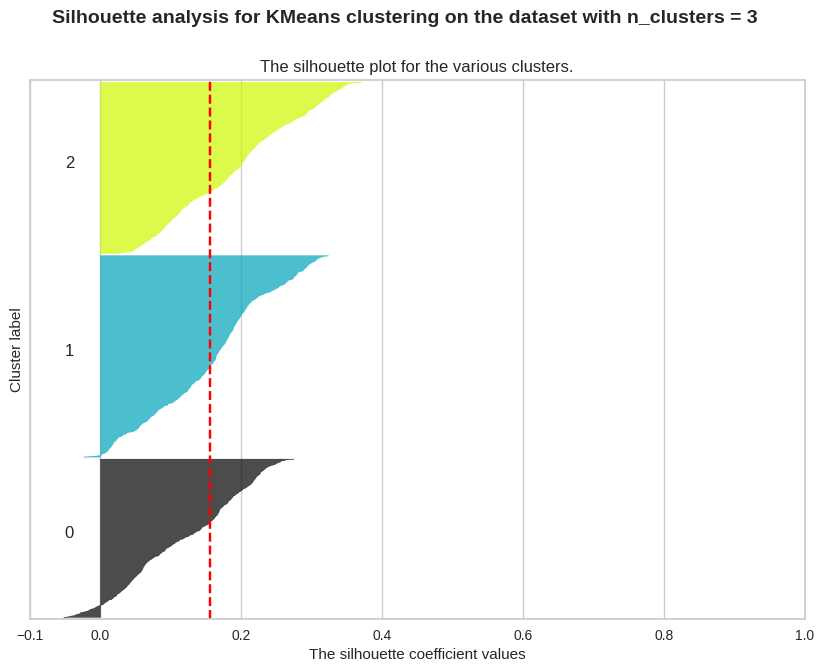

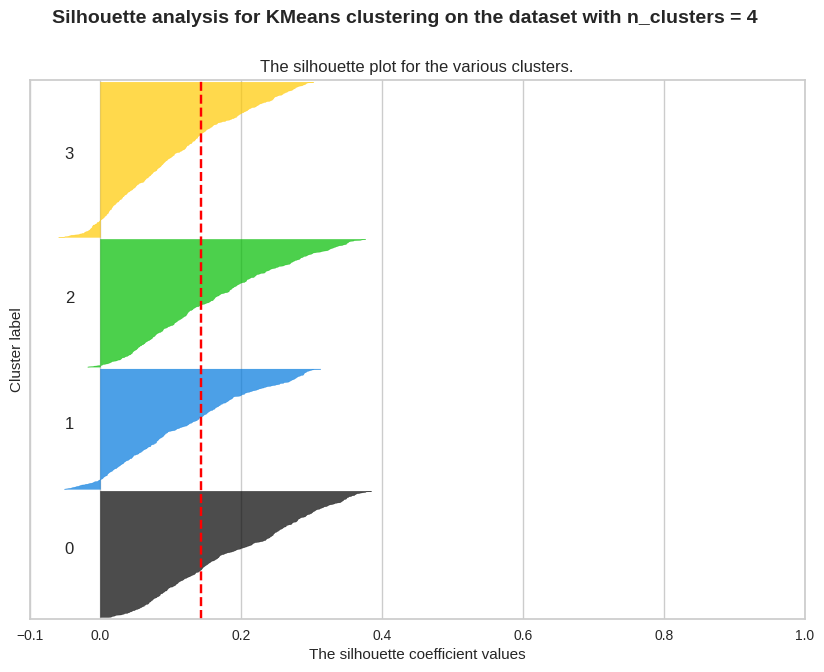

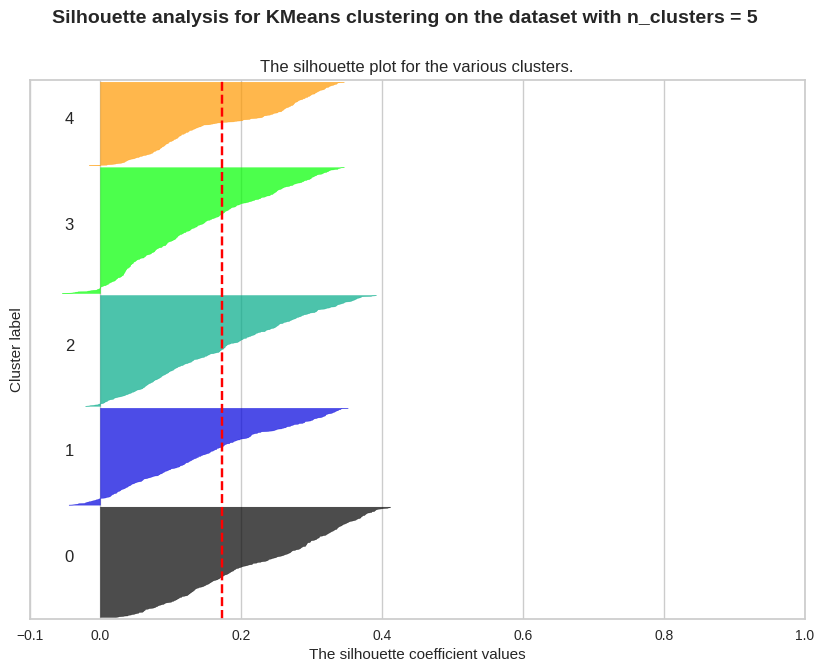

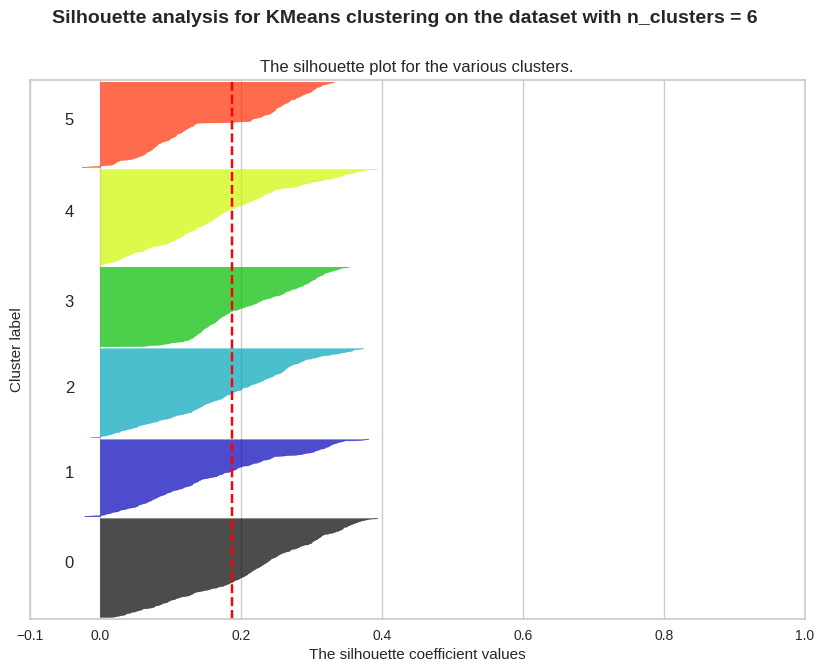

In [12]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler



# Standardize the data (important for KMeans clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# List of K values you want to evaluate
range_n_clusters = [2, 3, 4, 5, 6]

# Iterate through the different cluster sizes (K)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column (only the silhouette plot)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(f"Silhouette analysis for KMeans clustering on the dataset with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

plt.show()


We can see that after checking the silhouette scores for each of the different clusters, that the best amount of clusters is either **2 clusters**, we say this because it has the highest average silhouette score, as well as it not having any negative values like the other clusters, all other clusters have negative values.

However, we can also say that the **6 clusters** is also very good, it has a high score, and very few negative values, so we will keep it into consideration

## Calculating the WCSS for each cluster.

WCSS (Within-Cluster Sum of Squares) measures the compactness of the clusters. Specifically, it is the sum of squared distances between each data point in a cluster and the centroid of that cluster. It quantifies how close the points within each cluster are to their respective centroids.

Then, Lower WCSS = Better Clusters.


In [15]:
# Loop over different cluster sizes
for n_clusters in range_n_clusters:
    # Fit KMeans model with the current value of n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=8953)
    kmeans.fit(df_scaled)

    # Calculate the Total Within-Cluster Sum of Squares (WCSS)
    wcss = kmeans.inertia_  # Using inertia_ which gives the total WCSS directly

    # Print the WCSS for the current number of clusters
    print(f"WCSS for {n_clusters} clusters: {wcss}")


WCSS for 2 clusters: 24977.658761310846
WCSS for 3 clusters: 21575.41543355333
WCSS for 4 clusters: 19458.41851979737
WCSS for 5 clusters: 18321.772373920856
WCSS for 6 clusters: 16547.679417750176


We can see for the WCSS that the lowest value is for 6 clusters, and the highest is for 2 clusters, indicating that **6 clusters** are the best, and **2 clusters** are the worst.


## Optimal number of clusters:
so far, we have checked both Silhouette scores and WCSS, and had a general idea about the optimal number of clusters.


now for justifying the choice of the number of clusters k in k-mean we will use The elbow method and average silhouette method. they are also used to find the optimal number of clusters in a k-means clustering algorithm.

### Elbow method:

Elbow method with the Within-Cluster Sum of Squares (WSS) to find the optimal number of clusters in a k-means clustering algorithm.

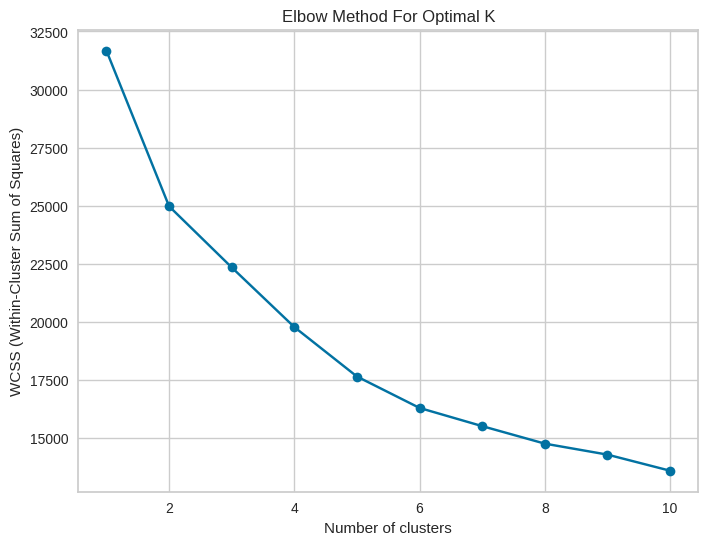

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming your dataframe is df and the relevant features are selected

# Calculate WCSS for different values of K (e.g., from 1 to 10)
wcss = []
for k in range(1, 11):  # K=1 to K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Use the scaled data (df_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


We notice that the graph flattens at **6 clusters**, meaning that the value on the left decreases slower when it reaches 6.

let us check out the silhouette method and see what output it will offer to us.

### Average silhouette method:


The silhouette method helps understand the quality of clustering by measuring how similar an object is to its own cluster compared to other clusters. The optimal number of clusters is often associated with a high average silhouette score.

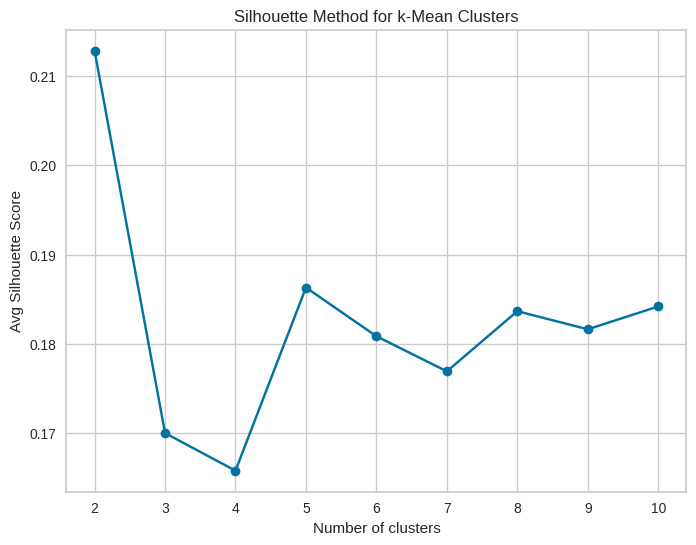

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for different values of K (e.g., from 2 to 10)
silhouette_scores = []
for k in range(2, 11):  # K=2 to K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)  # Use the scaled data
    score = silhouette_score(df_scaled, cluster_labels)  # Calculate the silhouette score
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
plt.title('Silhouette Method for k-Mean Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Avg Silhouette Score')
plt.show()


According to the graph above, 2 clusters is the highest.
but we also saw the elbow method showing that 6 clusters is the optimal, when we check out 6 in the silhouette graph, we can see that the score between 2 and 6 aren't too different or distinct from each other (18-21).



## Conclusion and choice of amount of clusters:

at this point, we are between 2 and 6 clusters, generally, 6 clusters seems like a good choice for the following reasons:

- High silhouette score.
- Very few negative values in silhouette score.
- Lowest WCSS value.
- Elbow method indication.
- Results in silhouette method are not too bad.